# Data Importing

For this exercise, data comes with a set of CSV files which are to be imported into pandas dataframes. As these are time-series data, the date column of each dataframe is to be used as index and therefore is imported in datetime format.

In [1]:
# Importing the necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
%matplotlib inline

In [2]:
# Reading the csv files into dataframe formats
ETH = pd.read_csv("./data/ethereum_prices.csv", index_col=0, parse_dates=True)
OMG = pd.read_csv("./data/omisego_prices.csv", index_col=0, parse_dates=True)
QTUM = pd.read_csv("./data/qtum_prices.csv", index_col=0, parse_dates=True)
GNT = pd.read_csv("./data/golem_prices.csv", index_col=0, parse_dates=True)

# Data Wrangling

Data is to be wrangled to a format which allows prediction of OMG, QTUM, and GNT prices using ETH prices. In doing so, tables of these token prices are merged with ETH prices.

In [3]:
# Initial inspection of the ETH dataframe
ETH.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-12-22,822.64,827.68,543.76,674.86,"4,977,710,000","79,374,400,000"
2017-12-21,820.24,880.54,792.69,821.06,"3,569,060,000","79,125,300,000"
2017-12-20,827.52,845.06,756.00,819.09,"3,969,940,000","79,810,600,000"
2017-12-19,793.90,881.94,785.34,826.82,"4,096,550,000","76,552,200,000"
2017-12-18,721.73,803.93,689.23,794.64,"3,249,230,000","69,578,400,000"


In [4]:
# Inspection of the data types
ETH.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 869 entries, 2017-12-22 to 2015-08-07
Data columns (total 6 columns):
Open          869 non-null float64
High          869 non-null float64
Low           869 non-null float64
Close         869 non-null float64
Volume        869 non-null object
Market Cap    869 non-null object
dtypes: float64(4), object(2)
memory usage: 47.5+ KB


It must be noted that the volume and market cap are currently string objects. These must be converted into floats in order for them to be used for analyses.

In [5]:
# Creating a list of the dataframes created so far
df_list = [ETH, OMG, QTUM, GNT]

In [6]:
# Removing spaces
for i in df_list:
    i.rename(columns=lambda x: x.replace(' ', ''), inplace=True)

In [7]:
# Converting volume and marketcap columns into numerical data types
for i in df_list:
    i.Volume = i.Volume.str.replace(',', '')
    i.Volume = pd.to_numeric(i.Volume, errors='coerce')
    i.MarketCap = i.MarketCap.str.replace(',', '')
    i.MarketCap = pd.to_numeric(i.MarketCap, errors='coerce')

In [8]:
ETH.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 869 entries, 2017-12-22 to 2015-08-07
Data columns (total 6 columns):
Open         869 non-null float64
High         869 non-null float64
Low          869 non-null float64
Close        869 non-null float64
Volume       869 non-null int64
MarketCap    868 non-null float64
dtypes: float64(5), int64(1)
memory usage: 47.5 KB


In [9]:
# Initiating some helper variables for creating tables for analyses
timedifference = [0, 1, 2, 5, 7]
timedifference_str = ['0', '1', '2', '5', '7']
altcoins = [OMG, QTUM, GNT]
altcoins_str = ['OMG', 'QTUM', 'GNT']
original_index = ETH.index

In [10]:
# Initiating a variable for appropriate column names
col_names = ['Open_USD', 'High_USD', 'Low_USD', 'Close_USD', 'Volume', 'MarketCap_USD']

In [11]:
# Creating tables of ETH prices vs. prices of the altcoins with timeshifts
# Format of the variable names to be '{TokenName}ETH{TimeShiftInDays}'
for i in range(len(timedifference)):
    eth_shift = timedelta(days=timedifference[i])
    ETH.index = original_index + eth_shift
    for j in range(len(altcoins)):
        locals()[altcoins_str[j] + 'ETH' + timedifference_str[i]] = \
        pd.concat([ETH, altcoins[j]], axis=1, join='inner')
        locals()[altcoins_str[j] + 'ETH' + timedifference_str[i]].columns = \
        [n + '_ETH' + '_' + str(timedifference_str[i]) for n in col_names] + [n + '_' + altcoins_str[j] for n in col_names] 

In [12]:
# Inspecting the OMGETH1 table as a check
OMGETH1.head()

,Open_USD_ETH_1,High_USD_ETH_1,Low_USD_ETH_1,Close_USD_ETH_1,Volume_ETH_1,MarketCap_USD_ETH_1,Open_USD_OMG,High_USD_OMG,Low_USD_OMG,Close_USD_OMG,Volume_OMG,MarketCap_USD_OMG
Date,,,,,,,,,,,,
2017-12-22,820.24,880.54,792.69,821.06,3569060000,7.912530e+10,17.53,17.53,9.67,12.88,210269000.0,1.789150e+09
2017-12-21,827.52,845.06,756.00,819.09,3969940000,7.981060e+10,17.87,18.84,16.12,17.12,127590000.0,1.823820e+09
2017-12-20,793.90,881.94,785.34,826.82,4096550000,7.655220e+10,18.19,19.18,15.88,17.79,178069000.0,1.856030e+09
2017-12-19,721.73,803.93,689.23,794.64,3249230000,6.957840e+10,18.50,21.51,17.12,18.14,247996000.0,1.887880e+09
2017-12-18,696.24,735.83,696.24,719.98,2147390000,6.710640e+10,16.20,18.58,14.81,18.50,216024000.0,1.653590e+09


Looking at the above OMGETH1 ({TokenName}ETH{TimeShiftInDays}) table, it can be seen that it's a table with datetime index. Each line represents a sample containing OMG price information and ETH price information shifted backwards by 1 day. For instance, ETH price from 2017-07-15 was presented in the 2017-07-16 sample. This was done to allow analyses on the impact of past ETH prices on present token prices. It should also be noted that the columns for each cryptocurrency includes open, high, low, and close prices as well as volume and market capitalization. For the ETH columns, suffix of 1 indicates timeshift of 1.

In [13]:
# Further inspecting on the OMGETH1 table and tables of other tokens
OMGETH1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 2017-12-22 to 2017-07-14
Freq: -1D
Data columns (total 12 columns):
Open_USD_ETH_1         162 non-null float64
High_USD_ETH_1         162 non-null float64
Low_USD_ETH_1          162 non-null float64
Close_USD_ETH_1        162 non-null float64
Volume_ETH_1           162 non-null int64
MarketCap_USD_ETH_1    162 non-null float64
Open_USD_OMG           162 non-null float64
High_USD_OMG           162 non-null float64
Low_USD_OMG            162 non-null float64
Close_USD_OMG          162 non-null float64
Volume_OMG             162 non-null float64
MarketCap_USD_OMG      160 non-null float64
dtypes: float64(11), int64(1)
memory usage: 16.5 KB


In [14]:
QTUMETH1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 213 entries, 2017-12-22 to 2017-05-24
Freq: -1D
Data columns (total 12 columns):
Open_USD_ETH_1         213 non-null float64
High_USD_ETH_1         213 non-null float64
Low_USD_ETH_1          213 non-null float64
Close_USD_ETH_1        213 non-null float64
Volume_ETH_1           213 non-null int64
MarketCap_USD_ETH_1    213 non-null float64
Open_USD_QTUM          213 non-null float64
High_USD_QTUM          213 non-null float64
Low_USD_QTUM           213 non-null float64
Close_USD_QTUM         213 non-null float64
Volume_QTUM            213 non-null int64
MarketCap_USD_QTUM     163 non-null float64
dtypes: float64(10), int64(2)
memory usage: 21.6 KB


In [15]:
GNTETH1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 400 entries, 2017-12-22 to 2016-11-18
Freq: -1D
Data columns (total 12 columns):
Open_USD_ETH_1         400 non-null float64
High_USD_ETH_1         400 non-null float64
Low_USD_ETH_1          400 non-null float64
Close_USD_ETH_1        400 non-null float64
Volume_ETH_1           400 non-null int64
MarketCap_USD_ETH_1    400 non-null float64
Open_USD_GNT           400 non-null float64
High_USD_GNT           400 non-null float64
Low_USD_GNT            400 non-null float64
Close_USD_GNT          400 non-null float64
Volume_GNT             400 non-null int64
MarketCap_USD_GNT      388 non-null float64
dtypes: float64(10), int64(2)
memory usage: 40.6 KB


Based on the above inspections, it was noted that a lot more price points have been provided by CoinMarketCap compared to AlphaVantage API. Therefore, CoinMarketCap will be use as a source of pricing data.

# Data Storytelling

With the data imported and wrangled, it probably makes sense to get an indication on whether or not there is a likely relationship between ETH price and prices of OMG, QTUM, and GNT. This is to be done visually using graphs of various types.

In [16]:
# Creating visualisation of relationship between the close prices of the different tokens against different time
# shifts of ETH prices
price_df = pd.concat([OMGETH0.Close_USD_ETH_0, OMGETH1.Close_USD_ETH_1, OMGETH2.Close_USD_ETH_2, \
                      OMGETH5.Close_USD_ETH_5, OMGETH7.Close_USD_ETH_7, 
                    OMGETH0.Close_USD_OMG, QTUMETH0.Close_USD_QTUM, GNTETH0.Close_USD_GNT], \
                   axis=1, keys=['ETH0', 'ETH1', 'ETH2', 'ETH5', 'ETH7', 'OMG', 'QTUM', 'GNT'], join='inner')

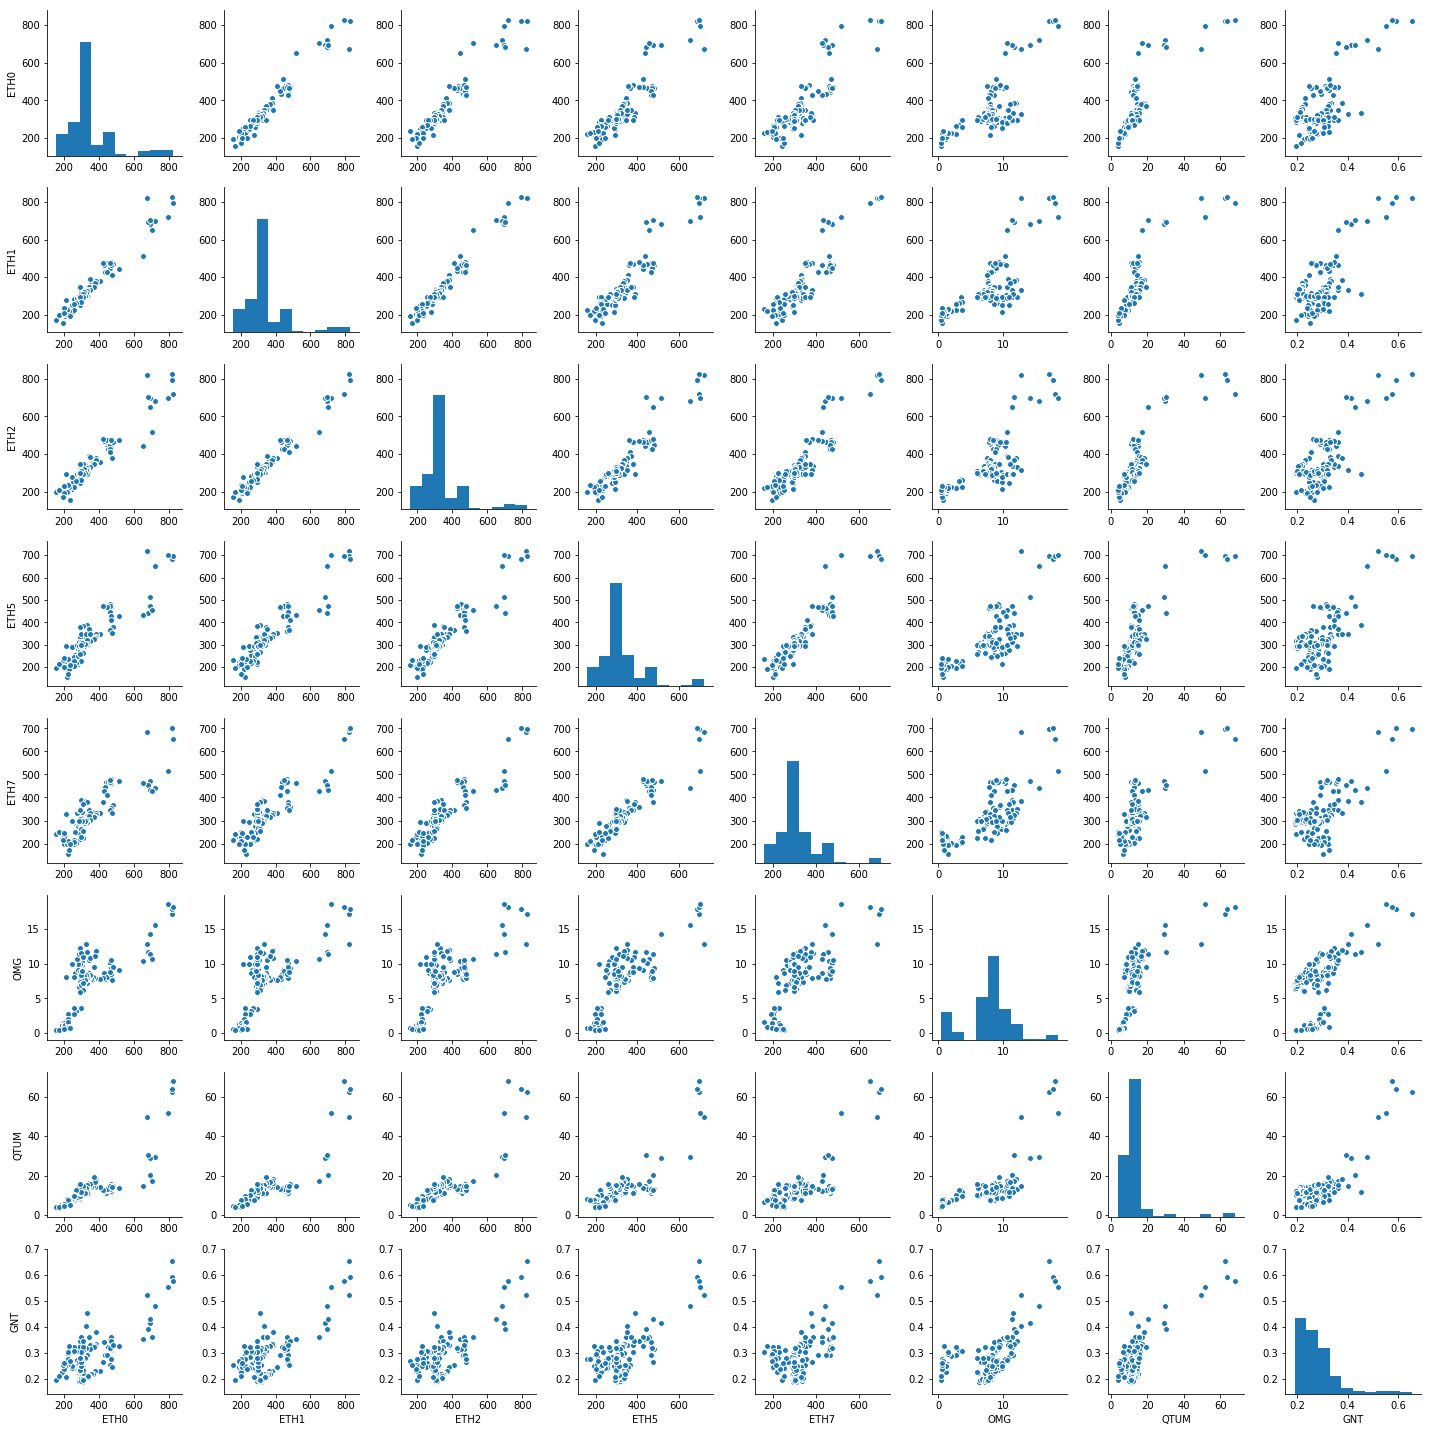

In [17]:
# Performing a pairplot of the prices
sns.pairplot(price_df);

It can be seen that there is generally a positive relationship between ETH price and prices of OMG, QTUM, and GNT. 

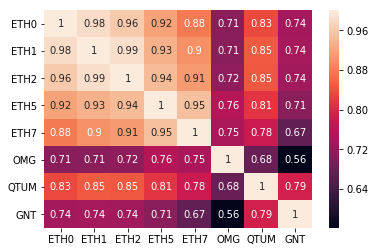

In [18]:
# Inspecting the correlations between the different prices
sns.heatmap(price_df.corr(), annot=True)

The above heatmap shows the cross-correlations between the different timeshifts of ETH prices and prices of OMG, QTUM, and GNT. It can be seen that strong correlations are generally shown between ETH price and prices of the tokens.

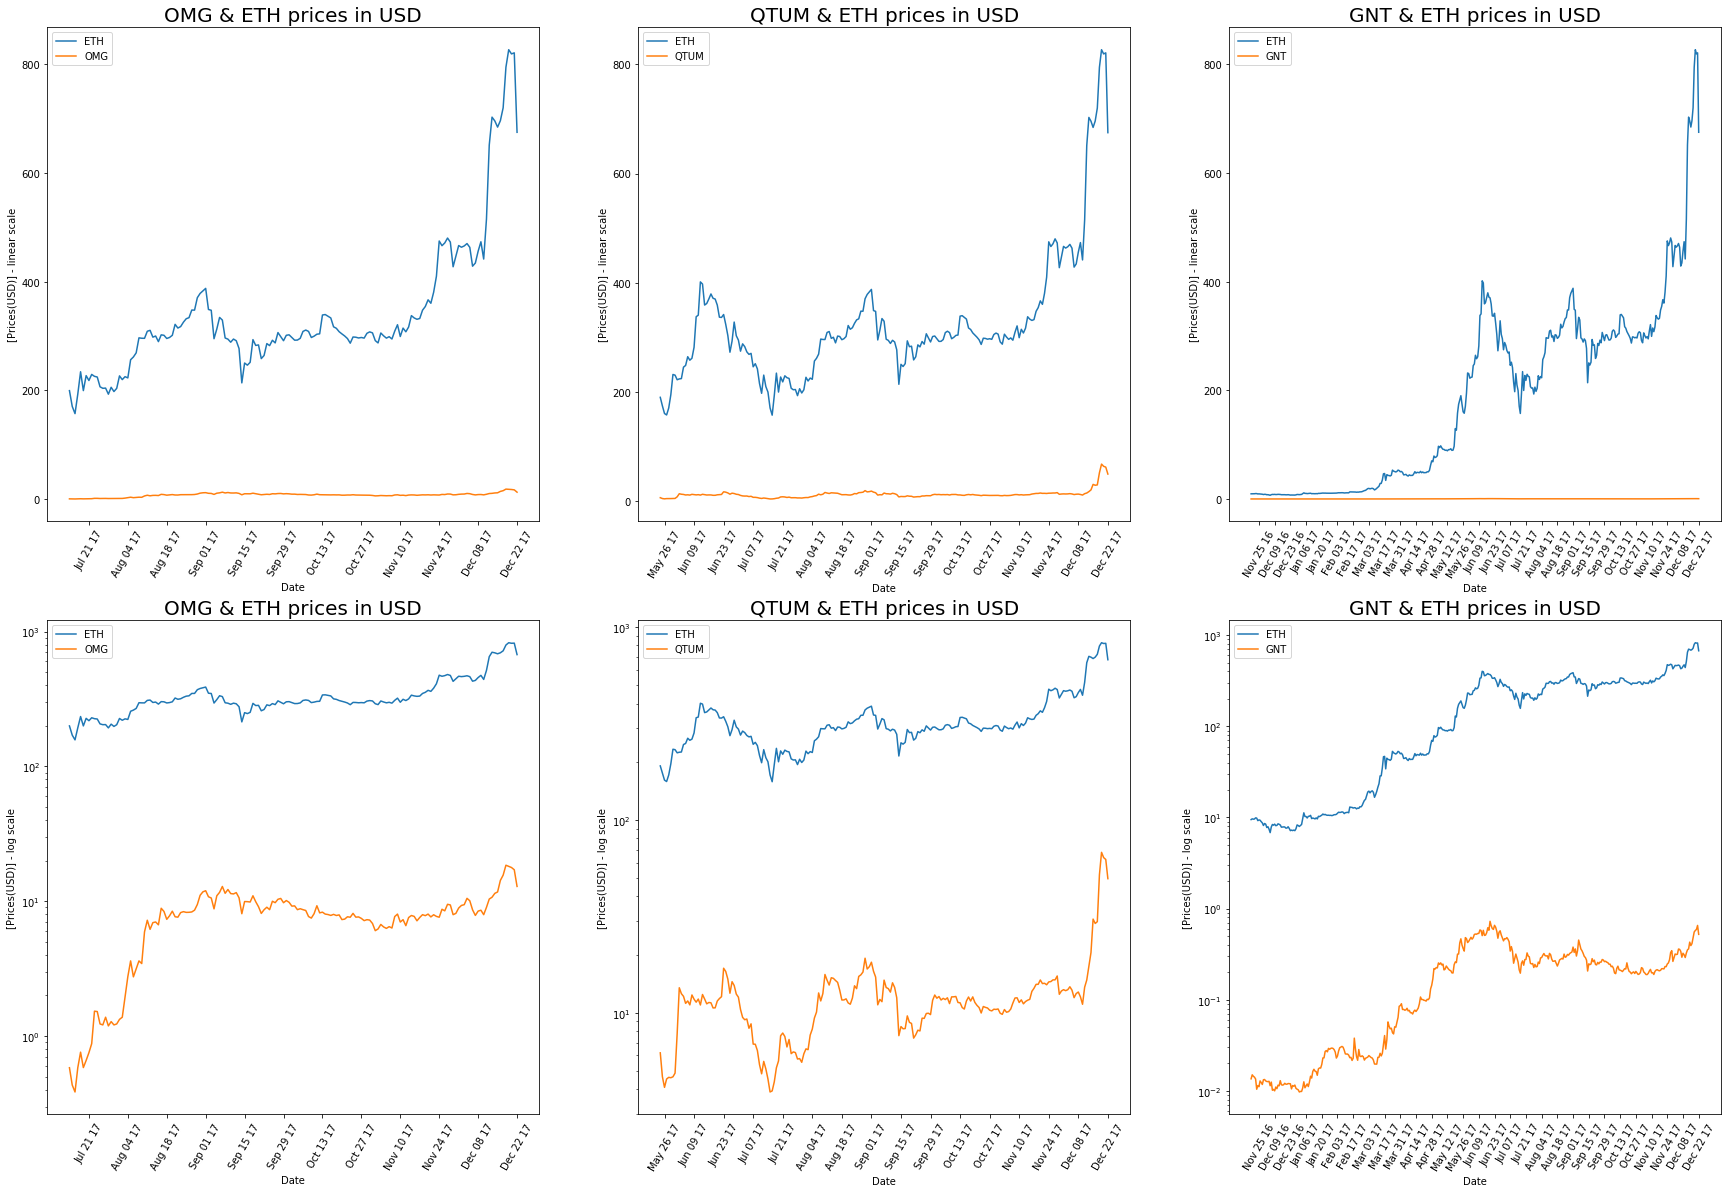

In [19]:
# Plotting price charts of ETH/USD and tokens[OMG, QTUM, GNT]/USD in order to visualize relationship on price movements.
aux_list = ['linear', 'log']
plt.figure(figsize=(30, 20))
for i, a in enumerate(aux_list):
    plt.subplot(2, 3, 1+3*i)
    X = [datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S') for x in OMGETH0.index]
    plt.plot(X, OMGETH0.Close_USD_ETH_0, label='ETH')
    plt.plot(X, OMGETH0.Close_USD_OMG, label='OMG')
    labels = [datetime.strftime(x, '%b %d %y') for x in X]
    plt.xticks(X[::14], labels[::14], rotation=60)
    plt.yscale(a)
    plt.xlabel('Date')
    plt.ylabel('[Prices(USD)] - ' + a + ' scale')
    plt.title('OMG & ETH prices in USD', fontsize=20)
    plt.legend()

    plt.subplot(2, 3, 2+3*i)
    X = [datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S') for x in QTUMETH0.index]
    plt.plot(X, QTUMETH0.Close_USD_ETH_0, label='ETH')
    plt.plot(X, QTUMETH0.Close_USD_QTUM, label='QTUM')
    labels = [datetime.strftime(x, '%b %d %y') for x in X]
    plt.xticks(X[::14], labels[::14], rotation=60)
    plt.yscale(a)
    plt.xlabel('Date')
    plt.ylabel('[Prices(USD)] - ' + a + ' scale')
    plt.title('QTUM & ETH prices in USD', fontsize=20)
    plt.legend()

    plt.subplot(2, 3, 3+3*i)
    X = [datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S') for x in GNTETH0.index]
    plt.plot(X, GNTETH0.Close_USD_ETH_0, label='ETH')
    plt.plot(X, GNTETH0.Close_USD_GNT, label='GNT')
    labels = [datetime.strftime(x, '%b %d %y') for x in X]
    plt.xticks(X[::14], labels[::14], rotation=60)
    plt.yscale(a)
    plt.xlabel('Date')
    plt.ylabel('[Prices(USD)] - ' + a + ' scale')
    plt.title('GNT & ETH prices in USD', fontsize=20)
    plt.legend()
plt.show()

As it can be seen in the charts above, OMG, QTUM, and GNT prices generally follow similar movements to ETH prices on a logarithmic scale. Based on this, one would believe that ETH could be a good predictor for the token prices.

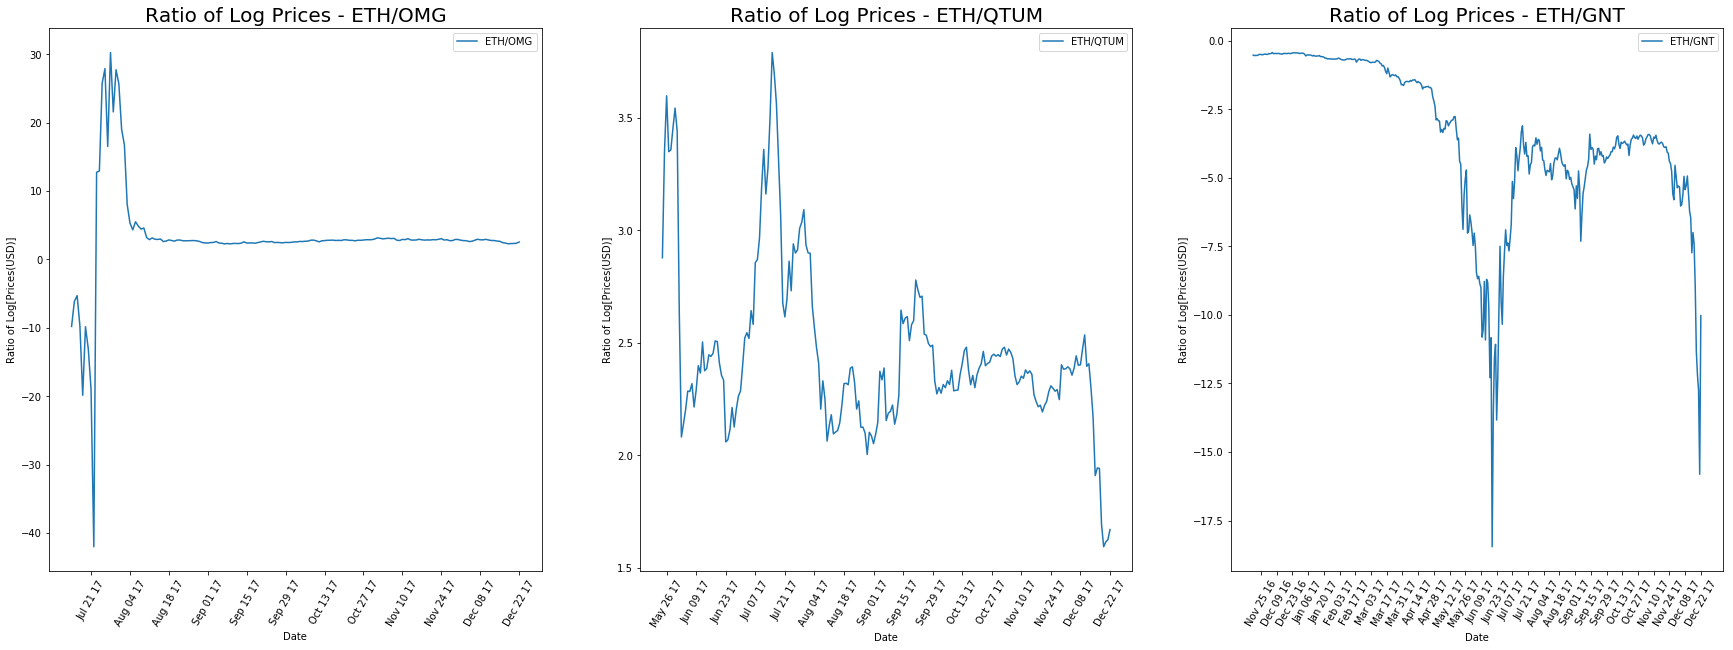

In [20]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
X = [datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S') for x in OMGETH0.index]
plt.plot(X, np.log(OMGETH0.Close_USD_ETH_0)/np.log(OMGETH0.Close_USD_OMG), label='ETH/OMG')
labels = [datetime.strftime(x, '%b %d %y') for x in X]
plt.xticks(X[::14], labels[::14], rotation=60)
plt.xlabel('Date')
plt.ylabel('Ratio of Log[Prices(USD)]')
plt.title('Ratio of Log Prices - ETH/OMG', fontsize=20)
plt.legend()

plt.subplot(1, 3, 2)
X = [datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S') for x in QTUMETH0.index]
plt.plot(X, np.log(QTUMETH0.Close_USD_ETH_0)/np.log(QTUMETH0.Close_USD_QTUM), label='ETH/QTUM')
labels = [datetime.strftime(x, '%b %d %y') for x in X]
plt.xticks(X[::14], labels[::14], rotation=60)
plt.xlabel('Date')
plt.ylabel('Ratio of Log[Prices(USD)]')
plt.title('Ratio of Log Prices - ETH/QTUM', fontsize=20)
plt.legend()

plt.subplot(1, 3, 3)
X = [datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S') for x in GNTETH0.index]
plt.plot(X, np.log(GNTETH0.Close_USD_ETH_0)/np.log(GNTETH0.Close_USD_GNT), label='ETH/GNT')
labels = [datetime.strftime(x, '%b %d %y') for x in X]
plt.xticks(X[::14], labels[::14], rotation=60)
plt.xlabel('Date')
plt.ylabel('Ratio of Log[Prices(USD)]')
plt.title('Ratio of Log Prices - ETH/GNT', fontsize=20)
plt.legend()
plt.show()

# Inferential Statistics

If there is a relationship between ETH prices and prices of the tokens, the ratios of the log prices for OMG, QTUM, GNT to ETH should stay more or less the same. Therefore, we can take a mean of the most recent intraday prices for each of the tokens and perform one-sample, two-tailed hypothesis test using the data sample available.

The average of the log ratios calculated using token prices between 25th to 28th Dec, 2017 are as follows:

 - Log(ETH)/Log(OMG): 2.452425881301168
 
 - Log(ETH)/Log(QTUM): 1.7153423020842327
 
 - Log(ETH)/Log(GNT): -32.46995248706901

Please note that the prices used for the calculations were obtained from Alpha Vantage API.

In [21]:
ETHOMGobs = 2.4524
ETHQTUMobs = 1.7153
ETHGNTobs = -32.4700

In [22]:
OMGETH0['LogRatio'] = np.log(OMGETH0['Close_USD_ETH_0'])/np.log(OMGETH0['Close_USD_OMG'])
QTUMETH0['LogRatio'] = np.log(QTUMETH0['Close_USD_ETH_0'])/np.log(QTUMETH0['Close_USD_QTUM'])
GNTETH0['LogRatio'] = np.log(GNTETH0['Close_USD_ETH_0'])/np.log(GNTETH0['Close_USD_GNT'])

Null hypothesis: the log ratios mentioned above stay constant around its mean.

Confidence level: 95%

In [23]:
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, len(data)))
    return bs_replicates

In [24]:
LogRatioMean_OMGETH = np.mean(OMGETH0['LogRatio'], axis=0)
LogRatioMean_QTUMETH = np.mean(QTUMETH0['LogRatio'], axis=0)
LogRatioMean_GNTETH = np.mean(GNTETH0['LogRatio'], axis=0)

print("LogRatioMean_OMGETH = " + str(LogRatioMean_OMGETH))
print("LogRatioMean_QTUMETH = " + str(LogRatioMean_QTUMETH))
print("LogRatioMean_GNTETH = " + str(LogRatioMean_GNTETH))

LogRatioMean_OMGETH = 3.1195377518284193
LogRatioMean_QTUMETH = 2.4548782595860814
LogRatioMean_GNTETH = -3.490745679754401


In [25]:
bs_reps_ETHOMG = draw_bs_reps(OMGETH0['LogRatio'], np.mean, 10000)
bs_reps_ETHQTUM = draw_bs_reps(QTUMETH0['LogRatio'], np.mean, 10000)
bs_reps_ETHGNT = draw_bs_reps(GNTETH0['LogRatio'], np.mean, 10000)

In [26]:
p_ETHOMG = np.sum(bs_reps_ETHOMG < ETHOMGobs)/len(bs_reps_ETHOMG)
print("p-value: {:.4f}".format(p_ETHOMG))

p-value: 0.1159


In [27]:
p_ETHQTUM = np.sum(bs_reps_ETHQTUM < ETHQTUMobs)/len(bs_reps_ETHQTUM)
print("p-value: {:.4f}".format(p_ETHQTUM))

p-value: 0.0000


In [28]:
p_ETHGNT = np.sum(bs_reps_ETHGNT < ETHGNTobs)/len(bs_reps_ETHGNT)
print("p-value: {:.4f}".format(p_ETHGNT))

p-value: 0.0000


Hence, it was found that apart from OMG token, the other two tokens cannot be predicted with ETH price.